#### 1. Introduction
#### 2. Data Preparation
     2.1 Load Data
     2.2 Check for missing values
     2.3 Feature Scaling
     2.4 Split into train and validation data
#### 3. Multi Layer Perceptron
#### 4. Evaluate the model
     4.1 Confusion Matrix
#### 5. Submission Score



## 1. Introduction

   In the past two decades Artificial Intelligence have seen a great developement, almost supassing the human level capabilities. Now we'll implement a simple Multi Layer Perceptron (MLP) to identify/classify the images of handwritten digits. This classification [problem](https://www.kaggle.com/c/digit-recognizer/overview) is taken from [kaggle](https://www.kaggle.com).

## 2. Data Preparation
   Go to this [URL](https://www.kaggle.com/c/digit-recognizer/overview), download the data and extract if needed into your project's working directory.
   

In [10]:
# Import all the necessary library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier

### 2.1 Load Data

In [20]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 2.2 Check for missing values

In [12]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

There is only one value (unique = 1) which is False, shows there isn't any missing value. 

   Sometimes we might be stumbled upon imbalanced training data which has lot of frequency bias towards one/some class(es). Mostly this doesn't affect the performance of the classifier as long as there is sufficient training data provided for all the classes/labels. For example, if the trainig data of 100 images has 90 images of label '1' then remaining 9 labels (called minority classes) have one traning image for each of them. Training an ML model on this data might accurately recognise the images with '1' but it fails to classify the remaining 9 labels. 
   
   Plot the data distribution to find out if any frequency bias present in the data.

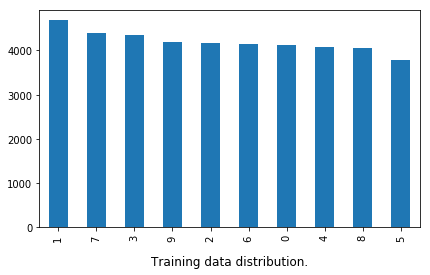

In [13]:
fig = plt.figure(figsize=(15,4))
a = fig.add_subplot(1, 2, 1)
train['label'].value_counts().plot(kind='bar')
a.set_title('Training data distribution.', y=-0.2)
plt.show()

In [14]:
# Separate the data and labels, convert into numpy arrays
tr_label = train[['label']].T.values
del train['label']

train = train.to_numpy()

test = test.to_numpy()

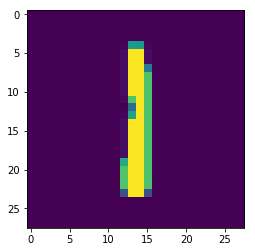

In [20]:
plt.imshow(train[2].reshape(28,28))

### 2.3 Feature Scaling
   [Feature Scaling or Normalization](https://en.wikipedia.org/wiki/Feature_scaling) is an important step in data processing for **Machine Learning** problems. This helps the algorithm to converge faster.

In [40]:
# Normalizing the values
train = train / 255.0
test = test / 255.0

### 2.4 Split train and validation data
   Here I'm going to split the training data into two sets, 90% for training and 10% for evaluation respectively. To keep the same distribution in both train and evaluation datasets, I've used SKlearn's 'train_test_split' with stratify enabled.

In [44]:
# stratify = y, maintains the same distribution of labels in both train and test splits
x_train, x_eval, y_train, y_eval = train_test_split(train, tr_label[0], 
                                                    test_size=0.10, 
                                                    random_state=4,
                                                   stratify=tr_label[0])

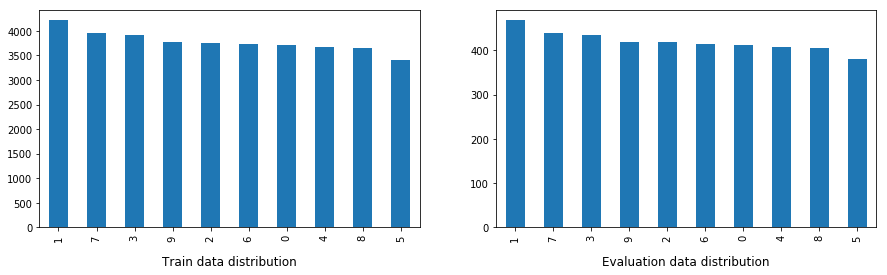

In [45]:
fig = plt.figure(figsize=(15,4))
a = fig.add_subplot(1, 2, 1)
pd.DataFrame({'label':y_train})['label'].value_counts().plot(kind='bar')
a.set_title("Train data distribution", y=-0.2)

a = fig.add_subplot(1, 2, 2)
pd.DataFrame({'label':y_eval})['label'].value_counts().plot(kind='bar')
a.set_title("Evaluation data distribution", y=-0.2)

plt.show()

In [62]:
## one-hot-encoding has to be done for categorical attributes not for classes

# enc = OneHotEncoder(categories='auto', drop=None, sparse=False, dtype=np.int)
# # enc.fit(train[['label']])

# one_hot_y_train = enc.fit_transform(y_train.reshape(-1,1))
# one_hot_y_eval = enc.fit_transform(y_eval.reshape(-1,1))
# one_hot_y_eval

   Here we can see that both train and evaluation data have similar distribution.

## 3. Multi Layer Perceptron (MLP)

   A single layer neural network can only work with data that is linearly separalble. In other words it represents a straight line. To learn the complex relationship between the pixels of an image, we need a curve that can classify multiple classes accurately. For that the neural network shold have more than one layer. 
   
   For simplicity and quick learning, I'm choosing an MLP with three layers. Input layer, one hidden layer and an output layer. One hidden layer is sufficient for majority of problems. Another tough question to answer is, what is the size of the hidden layer? For most of the problems we can get a decent performance by keeping a single hidden layer with size equal to the mean of the sizes of input layer and output layer.
   
   Here input layer size = size of input (28 * 28)
   output layer size = number of classes (10)

In [59]:
mlp = MLPClassifier(hidden_layer_sizes=(397,), 
                    activation='logistic', 
                    alpha=1e-4,
                    solver='sgd', 
                    tol=1e-6, 
                    random_state=1, 
                    learning_rate='adaptive',
                    learning_rate_init=.1, 
                    verbose=True, max_iter=1000)

mlp.fit(x_train, y_train)

Iteration 1, loss = 1.48377937
Iteration 2, loss = 0.65610870
Iteration 3, loss = 0.54468045
Iteration 4, loss = 0.46738098
Iteration 5, loss = 0.40794274
Iteration 6, loss = 0.36394450
Iteration 7, loss = 0.32767537
Iteration 8, loss = 0.29737780
Iteration 9, loss = 0.27206254
Iteration 10, loss = 0.25105341
Iteration 11, loss = 0.23263090
Iteration 12, loss = 0.21626015
Iteration 13, loss = 0.20153041
Iteration 14, loss = 0.18903058
Iteration 15, loss = 0.17697286
Iteration 16, loss = 0.16708351
Iteration 17, loss = 0.15743021
Iteration 18, loss = 0.14879773
Iteration 19, loss = 0.14116437
Iteration 20, loss = 0.13371396
Iteration 21, loss = 0.12754468
Iteration 22, loss = 0.12063236
Iteration 23, loss = 0.11510227
Iteration 24, loss = 0.10935984
Iteration 25, loss = 0.10430172
Iteration 26, loss = 0.09969605
Iteration 27, loss = 0.09527011
Iteration 28, loss = 0.09082765
Iteration 29, loss = 0.08712873
Iteration 30, loss = 0.08366401
Iteration 31, loss = 0.07989226
Iteration 32, los

Iteration 253, loss = 0.00445366
Iteration 254, loss = 0.00444431
Iteration 255, loss = 0.00443261
Iteration 256, loss = 0.00441575
Iteration 257, loss = 0.00440755
Iteration 258, loss = 0.00439411
Iteration 259, loss = 0.00438154
Iteration 260, loss = 0.00437495
Iteration 261, loss = 0.00436375
Iteration 262, loss = 0.00435135
Iteration 263, loss = 0.00434453
Iteration 264, loss = 0.00433491
Iteration 265, loss = 0.00432216
Iteration 266, loss = 0.00430671
Iteration 267, loss = 0.00430322
Iteration 268, loss = 0.00429327
Iteration 269, loss = 0.00428052
Iteration 270, loss = 0.00426849
Iteration 271, loss = 0.00426212
Iteration 272, loss = 0.00424940
Iteration 273, loss = 0.00424536
Iteration 274, loss = 0.00423250
Iteration 275, loss = 0.00422545
Iteration 276, loss = 0.00421543
Iteration 277, loss = 0.00420660
Iteration 278, loss = 0.00419754
Iteration 279, loss = 0.00418859
Iteration 280, loss = 0.00418053
Iteration 281, loss = 0.00417015
Iteration 282, loss = 0.00416210
Iteration 

Iteration 502, loss = 0.00327822
Iteration 503, loss = 0.00327612
Iteration 504, loss = 0.00327498
Iteration 505, loss = 0.00327238
Iteration 506, loss = 0.00327068
Iteration 507, loss = 0.00326952
Iteration 508, loss = 0.00326783
Iteration 509, loss = 0.00326607
Iteration 510, loss = 0.00326400
Iteration 511, loss = 0.00326279
Iteration 512, loss = 0.00326127
Iteration 513, loss = 0.00325975
Iteration 514, loss = 0.00325794
Iteration 515, loss = 0.00325590
Iteration 516, loss = 0.00325443
Iteration 517, loss = 0.00325333
Iteration 518, loss = 0.00325061
Iteration 519, loss = 0.00324969
Iteration 520, loss = 0.00324801
Iteration 521, loss = 0.00324625
Iteration 522, loss = 0.00324465
Iteration 523, loss = 0.00324353
Iteration 524, loss = 0.00324211
Iteration 525, loss = 0.00324060
Iteration 526, loss = 0.00323787
Iteration 527, loss = 0.00323635
Iteration 528, loss = 0.00323506
Iteration 529, loss = 0.00323343
Iteration 530, loss = 0.00323166
Iteration 531, loss = 0.00323088
Iteration 

Iteration 747, loss = 0.00302575
Iteration 748, loss = 0.00302562
Iteration 749, loss = 0.00302552
Iteration 750, loss = 0.00302544
Iteration 751, loss = 0.00302527
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 752, loss = 0.00302435
Iteration 753, loss = 0.00302431
Iteration 754, loss = 0.00302430
Iteration 755, loss = 0.00302429
Iteration 756, loss = 0.00302424
Iteration 757, loss = 0.00302421
Iteration 758, loss = 0.00302423
Iteration 759, loss = 0.00302417
Iteration 760, loss = 0.00302415
Iteration 761, loss = 0.00302411
Iteration 762, loss = 0.00302410
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 763, loss = 0.00302392
Iteration 764, loss = 0.00302392
Iteration 765, loss = 0.00302391
Iteration 766, loss = 0.00302391
Iteration 767, loss = 0.00302390
Iteration 768, loss = 0.00302390
Iteration 769, loss = 0.00302389
Iteration 770

MLPClassifier(activation='logistic', hidden_layer_sizes=(397,),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=1000,
              random_state=1, solver='sgd', tol=1e-06, verbose=True)

## 4. Evaluate the model

In [24]:
# Got it by running the model by skipping the step 2.3
losses_no_norm = mlp.loss_curve_

In [60]:
# Got it by running the model by including the step 2.3
losses = mlp.loss_curve_

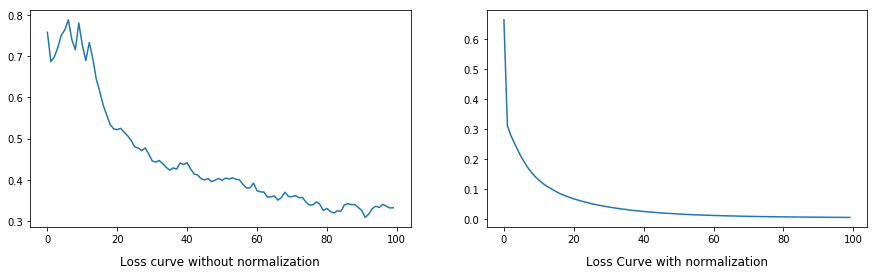

In [30]:
fig = plt.figure(figsize=(15,4))
a = fig.add_subplot(1, 2, 1)
plt.plot(np.arange(len(losses_no_norm)), losses_no_norm)
a.set_title("Loss curve without normalization", y=-0.2)

a = fig.add_subplot(1, 2, 2)
plt.plot(np.arange(len(losses)), losses)
a.set_title("Loss Curve with normalization", y=-0.2)

plt.show()

From the above plots, we can clearly see that the normalization actually helps in training to converge faster and smoother.<br><br>


In [61]:
predictions = mlp.predict(x_eval)
print("Evaluation Accuracy = ", accuracy_score(y_eval, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

### 4.1 Confusion Matrix

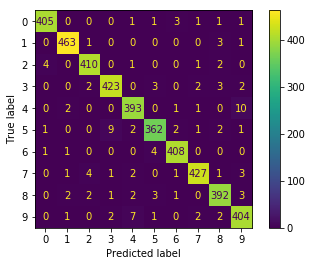

In [34]:
plot_confusion_matrix(mlp, x_eval, y_eval)

We can see that our trained model has performed well for all the digits with very few errors. However the mis-classification related to 9 and 4 is more compared to other digits. There are 10 images that classified as '9' but is actually is '4' and 7 images that are classified as '4' but actually is '9'.

### 5. Submission Score

In [12]:
result = mlp.predict(test)
result = pd.DataFrame({'ImageId':range(1, len(result)+1), 'Label':result})
result.to_csv('submission_digit_recog.csv', index=False)

Submission of this output has given me a score of 0.97400 in Kaggle which is very close to the evaluation score.<br><br>

If you find the article helpful, please share it across your network! 